# Taller de Machine Learning ICIF1041

    • Prueba Solemne 1
    • Alumno: Maria Paz Cisternas Pardo
    • Fecha de entrega: 9 Septiembre 2024 23:59


## Método de Aprendizaje de Clusterización
El método de aprendizaje de clusterización es una técnica de aprendizaje automático que busca descubrir patrones en los datos sin una variable objetivo-específica y agruparlos en categorías o grupos llamados clústeres, esto permite segmentar clientes o usuarios en función de la similitud de grupos naturales de datos.
Por lo tanto, para abordar las diferentes opciones de aprendizaje para el desafío entregado, se seleccionó el método de Clusterización.
La elección de este método se debe a su capacidad para identificar patrones continuos en datos numéricos lo que lo convierte en un punto de partida interesante que podría facilitar la generación de recomendaciones altamente personalizadas.

En este caso en particular, se utilizó *K-Means*, un algoritmo ampliamente utilizado en el método de clusterización supervisado, de esta forma se busca segmentar en grupos en función de los gustos musicales de los usuarios y sus similitudes.

A continuación, describiré como se aplicó este algoritmo paso a paso con los datos proporcionados.


In [54]:
import pandas as pd
spotify_dataset = pd.read_csv("Data/spotify_dataset.csv")
labeled_songs = pd.read_csv("Data/labeled_songs.csv")
user_preferences = pd.read_csv("Data/user_preferences.csv")

/var/folders/3w/y30mt9610mg800d5f3w0f6b40000gn/T/ipykernel_1557/682882559.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_dataset = pd.read_csv("Data/spotify_dataset.csv")


### 1.- Análisis y Limpieza de las Bases de Datos Proporcionadas
#### Análisis de Spotify_Dataset
En esta primera etapa se realiza un análisis minucioso de cada columna del conjunto de datos de spotify_dataset, con el propósito de identificar valores únicos junto a su distribución y tipo de datos asociados. De esta forma podremos comprender la naturaleza de los datos y detectar posibles inconsistencias.

En resumen, describiendo el proceso en orden:
- Primero se identifican los valores que tiene cada columna y si alguno proporciona algún valor estadístico.
- Una vez identificados procedemos con la selección de columnas y datos útiles para el análisis, los cuales son agrupados posteriormente en clústeres.
- Luego procederemos con la creación de un DataFrame con las columnas seleccionadas y revisaremos la integridad de sus datos con método `isnull().sum()`.

In [55]:
spotify_dataset.describe()

,Unnamed: 0.1,song_index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,21152.000000,21152.000000,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,12212.545906,12212.545906,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.000000,0.000000,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,10576.000000,10576.000000,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,21152.000000,21152.000000,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,31728.000000,31728.000000,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,42304.000000,42304.000000,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


El resumen estadístico generado por `describe()` revela una predominancia de valores numéricos y decimales, lo cual es ideal para aplicar técnicas de clustering, donde Analizando el conjunto de datos, hemos identificado las siguientes columnas como las más relevantes para nuestro análisis:
- **danceability:** que tan bailable(b) es la canción *(n >= b)*
- **energy:** intensidad y la actividad(e) percibida en la canción *(n >= e)*
- **valence:** sensación de la canción, alegre(a) o triste(t) *(t < a )*
- **acousticness:** sintonización electrónica(e) o acústica(a) *(e < a)*
- **instrumentalness:** presencia de vocales o completamente instrumental *(n <= 1)*
- **liveness:** sensación de ambiente de concierto(l) *(n >= l)*
- **tempo:** velocidad y ritmo de la canción *(BPM)*

Estas características, al ser medidas en escalas numéricas, nos permite calcular distancias entre las canciones y, por lo tanto, agruparlas en clústeres de manera objetiva.


In [56]:
atributos = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'tempo']
spotify_data = spotify_dataset[atributos]
spotify_data.head()

,danceability,energy,valence,acousticness,instrumentalness,liveness,tempo
0,0.831,0.814,0.3890,0.0598,0.013400,0.0556,156.985
1,0.719,0.493,0.1240,0.4010,0.000000,0.1180,115.080
2,0.850,0.893,0.0391,0.0138,0.000004,0.3720,218.050
3,0.476,0.781,0.1750,0.0237,0.000000,0.1140,186.948
4,0.798,0.624,0.5910,0.2170,0.000000,0.1660,147.988


In [57]:
spotify_data.isnull().sum()

danceability        0
energy              0
valence             0
acousticness        0
instrumentalness    0
liveness            0
tempo               0
dtype: int64

La evaluación del DataFrame *spotify_data* resuelve que todos los registros están completos, es decir, no hay valores nulos en ninguna de las columnas. Esto indica una alta calidad de los datos y nos permite avanzar directamente a la etapa de análisis.


### 2.- Normalización de Datos escalares
Con el objetivo de normalizar los datos para probar que todas las características contribuyan por igual al análisis, se aplicó una transformación estándar a cada característica. En este proceso, se calculó la media y la desviación estándar de cada atributo y, posteriormente, se transformaron los valores para que de esta manera, se obtenga una distribución con media cero y desviación estándar uno, lo cual facilita la comparación entre las diferentes características.
Esta transformación, realizada mediante *StandardScaler* empleando el método `fit_transform`.


In [58]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
spotify_data_escalar = escalar.fit_transform(spotify_data)

#### Módelo por método de Elbow
El Método de Elbow es un modelo de aprendizaje basado en la teoría técnica exploratoria utilizada en el campo del data mining y el aprendizaje automático el cual sigue lo siguientes pasos:
- **Ejecución múltiple del algoritmo:** El algoritmo de clustering se ejecuta varias veces, cada vez con cantidades distintas de clústeres.
- **Cálculo de la varianza:** Para cada ejecución, se calcula la varianza dentro de cada clúster. De esta forma se mide qué tan dispersos están los datos dentro de cada grupo.
- **Gráfica de la varianza:** Se crea una gráfica donde el eje x representa el número de clústeres y el eje y representa la varianza promedio de todos los clústeres.
- **Identificación del codo:** La gráfica generalmente muestra una curva que disminuye rápidamente al principio y luego se aplana. El punto de inflexión, donde la curva cambia de pendiente bruscamente, se denomina "codo".
- **Selección del número de clústeres:** El número de clústeres correspondiente al "codo" se considera el número óptimo de clústeres para el conjunto de datos.



##### Calculamos la Inercia del Dataframe:
La inercia es un indicador clave en el algoritmo de K-Means. Se utiliza para formar grupos compactos y cohesionados, minimizando la inercia.
Una inercia baja indica que los puntos dentro de cada clúster están cerca de su centroide, traduciéndose en una buena agrupación, pero si por el contrario la inercia es alta, se traduce en una mayor dispersión, por lo que los clústeres no estarían bien definidos.


In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inercia = []
for k in range(1, 11):
    kmeans_elbow = KMeans(n_clusters=k, random_state=42)
    kmeans_elbow.fit(spotify_data_escalar)
    inercia.append(kmeans_elbow.inertia_)

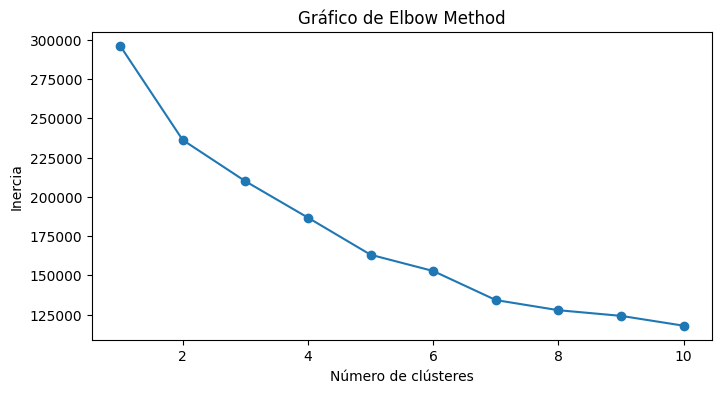

In [60]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.title('Gráfico de Elbow Method')
plt.show()


Se creó este gráfico para determinar el número óptimo de clústeres o grupos en el conjunto de datos por medio de K-Means.

En el **eje X** encontramos el número de Clústeres de 1 hasta 10.

En el **eje Y** observamos la inercia, donde la baja inercia significa que los datos están cerca de sus respectivos centroides.

Al analizar la curva, idealmente, se considera la diminución pronunciada de la inercia seguida de una diminución más gradual. Para determinar el número de Clústeres óptimos, se considera donde la curva cambia de pendiente.

En el gráfico podemos observar que en la medida que aumentan la cantidad de clústeres la inercia disminuye, por lo que es inversamente proporcional para el caso. Esto debe ser porque cuando aumentan los clústeres los datos están más cerca de su centroide, pero esto también puede traer como consecuencia un sobreajuste de datos y dificultar la interpretación de los resultados. En este gráfico en particular, la curva aumenta en 4 clústeres, siendo esta cantidad la opción más trabajable.

Utilizamos K-Means para agrupar en clústeres, este funciona de la siguiente manera:
- Comienza seleccionando aleatoriamente 4 centroides en el espacio.
- cada punto de dato es asignado al clúster que posea el centroide más cercano.
- Calcula el promedio de los puntos asignados a cada clúster para obtener nuevos centroides.
Estos pasos se repiten hasta que se alcanza el máximo de iteraciones.
Luego el método `fit_predict` retorna una lista de etiquetas de clústeres.

Estas etiquetas son añadidas en el Dataframe y comprobamos que las canciones tengan su etiqueta de clúster.


- Entrenamos el modelo Clusterización por medio de K-means con la cantidad optima de clusteres, determinados por el metodo de Elbow:

In [76]:
kmeans_elbow = KMeans(n_clusters=4, random_state=42)
kmeans_elbow_labels = kmeans_elbow.fit_predict(spotify_data_escalar)

- Agregar las etiquetas de clústeres al Dataframe original guardando el modelo como `spotify_elbow` y añadiendo una columan llamada `elbow_cluster`

In [77]:
spotify_elbow = spotify_dataset
spotify_elbow['elbow_cluster'] = kmeans_elbow_labels

- Comprobamos la correcta asignación de clusteres a las canciones

In [78]:
spotify_elbow[['song_name', 'elbow_cluster']].head()

,song_name,kmeans_cluster
0,Mercury: Retrograde,2
1,Pathology,0
2,Symbiote,2
3,ProductOfDrugs (Prod. The Virus and Antidote),1
4,Venom,2


#### Módelo por método de Silhouette Score
El Índice de silueta mide la cohesión y separación de clústeres, es decir, que tan similares son los datos de una misma categoría o clúster en comparación a los otros.
Su valor puede varias de -1 a 1, los valores más cercanos a 1 tienen una mejor definición de los clústeres y están separados, es decir, determina si los clústeres están bien separados y son cohesivos. Esta característica puede variar el número de clústeres y su conformación en comparación al método de Elbow.
Este calcula los puntos promedios de distancia ya sea de su propio clúster o de los otros, su resultado se interpreta de la siguiente manera:
-	**Si es cercano a 1;** el punto está mucho más cerca de su propio clúster que de los otros por lo tanto está bien asignado a su clúster
-	**Si es cercano a -1;** está más cerca de otros clústeres por lo que estaría mejor asignado a otro clúster.
-	**Si es cercano a 0;** está en la frontera de 2 clúster y encaja bien en ambos.

In [65]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spotify_data_escalar)
    score = silhouette_score(spotify_data_escalar, kmeans.labels_)
    silhouette_scores.append(score)

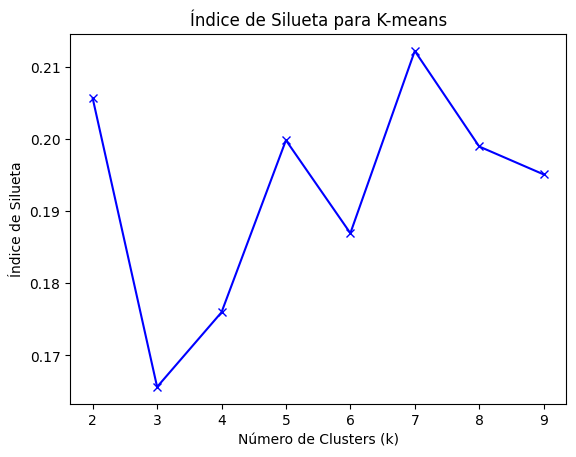

In [66]:
# Graficar el índice de silueta
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silueta')
plt.title('Índice de Silueta para K-means')
plt.show()

valor promedio del índice de silueta para cada valor de k. Este índice, como ya sabes, nos indica qué tan bien asignados están los datos a sus respectivos clusters. Valores más altos indican una mejor asignación.

Tendencia no monótona: A diferencia del ejemplo anterior, en esta gráfica no observamos una tendencia decreciente clara. En cambio, vemos que el índice de silueta alcanza un máximo en k=7. Esto sugiere que 7 clusters podría ser el número óptimo según este criterio.
Optimización del número de clusters: El objetivo es encontrar el valor de k que maximice el índice de silueta. En este caso, el máximo se alcanza en k=7, lo que indica que 7 clusters es la configuración que proporciona la mejor separación y cohesión entre los clusters.

- Entrenamos el modelo Clusterización por medio de K-means con la cantidad optima de clusteres, determinados por el metodo de Silhouette Score:

In [87]:
kmeans_silhouette = KMeans(n_clusters=7, random_state=42)
kmeans_silhouette = kmeans_silhouette.fit_transform(spotify_data_escalar)

- Agregar las etiquetas de clústeres al Dataframe original guardando el modelo como `spotify_elbow` y añadiendo una columan llamada `kmeans_cluster`

In [89]:
spotify_silhouette = spotify_data
spotify_silhouette['kmeans_cluster'] = kmeans_silhouette.predict(kmeans_silhouette)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [72]:
spotify_silhouette[['song_name', 'kmeans_cluster']].head()

,song_name,kmeans_cluster
0,Mercury: Retrograde,2
1,Pathology,0
2,Symbiote,2
3,ProductOfDrugs (Prod. The Virus and Antidote),1
4,Venom,2


#### Diagrama de Dispersión
Creamos un diagrama de dispersión, para visualizar la relación entre las dos variables numéricas *Danceability* y *Energy*.

Al observar el gráfico, podemos identificar los diferentes clústeres de canciones. Las canciones que se encuentran cerca unas de otras en el gráfico tienen características similares en términos de viabilidad y energía, por lo que podrían pertenecen al mismo estilo musical o compartir alguna otra característica común.

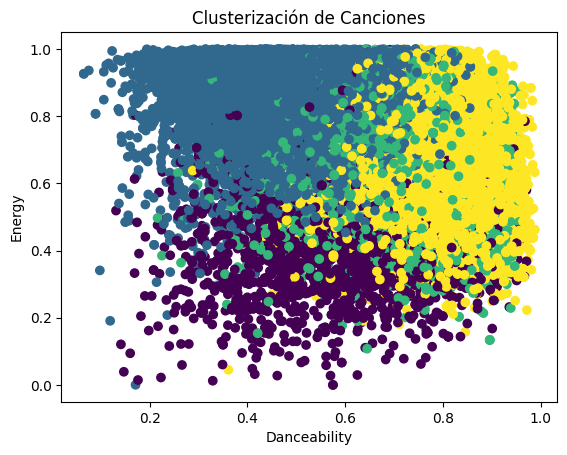

In [64]:
plt.scatter(spotify_elbow['danceability'], spotify_elbow['energy'], c=spotify_elbow['kmeans_cluster'])
plt.title('Clusterización de Canciones Elbow')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

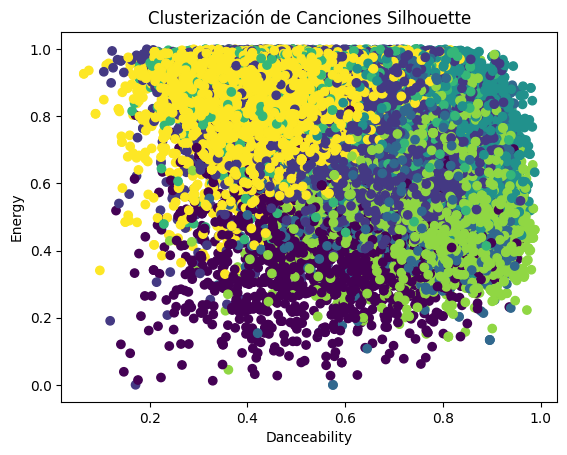

In [90]:
plt.scatter(spotify_silhouette['danceability'], spotify_silhouette['energy'], c=spotify_silhouette['kmeans_cluster'])
plt.title('Clusterización de Canciones Silhouette')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

Clusters bien definidos: Se observan grupos de puntos bien definidos, lo que sugiere que el algoritmo de clustering ha identificado patrones claros en los datos.
Relación entre "danceability" y "energy": Las canciones con valores altos de "danceability" tienden a tener también valores altos de "energy". Esto es lógico, ya que las canciones bailables suelen ser más enérgicas.
Heterogeneidad dentro de los clusters: Aunque los clusters están bien definidos, también hay cierta heterogeneidad dentro de cada uno. Esto significa que no todas las canciones de un mismo cluster tienen exactamente las mismas características.
Conclusiones preliminares:

Grupos de canciones similares: Las canciones que pertenecen al mismo cluster comparten características similares en términos de "danceability" y "energy".
Posibles géneros musicales: Es posible que cada cluster corresponda a un género musical diferente. Por ejemplo, un cluster podría corresponder a canciones de baile electrónico, mientras que otro podría corresponder a canciones de rock.
Otras características: Para confirmar esta hipótesis, sería necesario analizar otras características de las canciones, como el tempo, la tonalidad o la acústica.

### 3.- Asignación de etiquetas según genero

In [24]:
spotify_genre_elbow = spotify_elbow.merge(labeled_songs[['song_index', 'genre']], on='song_index', how='left')

In [19]:
for cluster in spotify_genre_elbow['kmeans_cluster'].unique():
  cluster_songs = spotify_genre_elbow[spotify_genre_elbow['kmeans_cluster'] == cluster]
  frequent_genre = cluster_songs['genre'].mode()[0]
  spotify_genre_elbow.loc[(spotify_genre_elbow['kmeans_cluster'] == cluster) & (spotify_genre_elbow['genre'].isnull()), 'genre'] = frequent_genre

In [ ]:
# Unir los datos etiquetados con el dataset de canciones por 'song_index'

# Asignar el género más frecuente en cada clúster
for cluster in spotify_genre['kmeans_cluster'].unique():
    # Filtrar las canciones del clúster actual
    cluster_songs = spotify_genre[spotify_genre['kmeans_cluster'] == cluster]

    # Encontrar el género más frecuente entre las canciones etiquetadas de este clúster
    most_frequent_genre = cluster_songs['genre'].mode()[0]

    # Asignar el género más frecuente a las canciones sin género en este clúster
    spotify_genre.loc[(spotify_genre['kmeans_cluster'] == cluster) & (spotify_genre['genre'].isnull()), 'genre'] = most_frequent_genre

# Ver las canciones con géneros asignados
spotify_genre[['song_index','kmeans_cluster', 'genre']].isnull().sum()


In [ ]:
user_preferences.columns = ['user_id', 'song_index']
# Obtener los clusters de las canciones que los usuarios han escuchado
user_preferences_with_clusters = user_preferences.merge(spotify_genre[['song_index', 'kmeans_cluster']], on='song_index', how='left')

In [ ]:
# Modificar la función para incluir nombre y género en las recomendaciones
def Recomendacion(usuario_songs, spotify_with_clusters, n_recomendaciones=10):
    # Identificar el clúster más escuchado por el usuario
    cluster_favorito = usuario_songs['kmeans_cluster'].mode()[0]

    # Seleccionar canciones de ese clúster que el usuario aún no haya escuchado
    canciones_no_escuchadas = spotify_genre[~spotify_genre['song_index'].isin(usuario_songs['song_index'])]
    recomendaciones = canciones_no_escuchadas[canciones_no_escuchadas['kmeans_cluster'] == cluster_favorito]

    # Seleccionar las primeras 'n_recomendaciones' canciones y mostrar 'song_id', 'name', y 'genre'
    return recomendaciones[['song_index', 'song_name', 'genre']].head(n_recomendaciones)

# Crear una lista de recomendaciones para cada usuario
recomendaciones_usuarios = {}

for usuario in user_preferences['song_index'].unique():
    # Obtener las canciones que el usuario ha escuchado
    usuario_songs = user_preferences_with_clusters[user_preferences_with_clusters['song_index'] == usuario]

    # Generar recomendaciones
    recomendaciones_usuarios[usuario] = recomendar_canciones(usuario_songs, spotify_genre)

# Mostrar recomendaciones para los primeros usuarios
for usuario, recomendaciones in recomendaciones_usuarios.items():
    print(f"Recomendaciones para el usuario {usuario}:")
    print(recomendaciones)
